In [44]:
import re
import regex
import pandas as pd
import numpy as np
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [45]:
def startWithDateAndTimeAndroid(s):
    pattern = r'^(\d{1,2}/\d{1,2}/\d{1,2}), (\d{1,2}:\d{2})[ ]?(AM|PM|am|pm)? -'
    result=re.match(pattern,s)
    if result:
        return True
    return False

In [46]:
def FindAuthor(s):
    s=s.split(":")
    if len(s)==2:
        return True 
    else:
        return False

In [47]:
def getDataPointAndroid(line):
    splitLine = line.split(' - ')
    dateTime, message = splitLine[0], ' '.join(splitLine[1:])
    
    # Extracting date, time, and author from the dateTime string
    date, time = None, None
    if ',' in dateTime:
        date_time_components = dateTime.split(', ')
        if len(date_time_components) == 2:
            date, time = date_time_components
            
    # Extracting author from the message
    author = None
    if FindAuthor(message):
        splitMessage = message.split(':')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    
    return date, time, author, message


In [48]:
def split_count(text):
    emoji_list=[]
    emojis_iter=map(lambda y:y, emoki.UNICODE_EMOJI['en'].keys())
    regex_set=re.compile('|'.join(re.escape(em) for em in emojis_iter))
    emojis_list=regex_set.findall(text)
    return emoji_list

In [49]:
parsedData=[]
conversationPath='Modified_Source.txt'
with open(conversationPath,encoding='utf-8') as fp:
    first=fp.readline()
    print(first)
    if '[' in first:
        device='ios'
    else:
        device="android"

    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        if device=='ios':
            line.strip()
            
            if startWithDateAndTimeios(line):
                if len(messageBuffer)>0:
                    paresedData.append([date,time,author,' '.join(messageBuffer)])
                messageBuffer.clear()
                date, time, author, message= getDataPointios(line)
                messageBuffer.append(message)
            else:
                line=(line.encode('ascii','ignore')).decode("utf-08")
                if startWithDateAndTimeios(line):
                    if len(messageBuffer)>0:
                        parsedData.append([date,time,author,' '.join(messageBuffer)])
                    messageBuffer.clear()
                    messageBuffer.append(message)
                else:
                    messageBuffer.append(line)
        else:
            line=line.strip()
        
            
            if startWithDateAndTimeAndroid(line) or True:
                data = getDataPointAndroid(line)
                if data is not None:
                    date, time, new_author, message = data
                    if date is None:
                        messageBuffer.append(line)
                    else:
                        if len(messageBuffer)>0:
                            parsedData.append([date,time,author,' '.join(messageBuffer)])
                        messageBuffer.clear()
                
                        date, time, author, message= getDataPointAndroid(line)
                        messageBuffer.append(message)
            

11/7/22, 9:10 PM - Sender 9 created group "Iiit una freshers"



In [50]:
if device=='android':
    df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%m/%d/%y')

    URLPATTERN=r'(https?://\S+)'
    df['urlcount']=df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
else:
    df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
    df = df.dropna()  # Drop rows with missing values
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%m/%d/%y')

    URLPATTERN=r'(https?://\S+)'
    df['urlcount']=df.Message.apply(lambda x:re.findall(URLPATTERN,x)).str.len()

In [51]:
df.head(20)


,Date,Time,Author,Message,urlcount
0,2022-11-09,10:16 AM,Sender 10,Bhai man bana lo khelna kya h 😂 hgv,0
1,2022-11-09,10:33 AM,Sender 73,🤣🤣😂,0
2,2022-11-09,10:34 AM,None,Sender 16 joined using this group's invite link,0
3,2022-11-09,10:35 AM,Sender 16,Kaise ho sare...,0
4,2022-11-09,10:42 AM,Sender 16,Group admin bnao mujhe...,0
5,2022-11-09,10:43 AM,Sender 155,Room to locked hai.. tum sb kidhr ho ground mein ??,0
6,2022-11-09,10:43 AM,Sender 4,Plan cancel ho gaya,0
7,2022-11-09,10:44 AM,Sender 16,209 mai aa jao...,0
8,2022-11-09,10:44 AM,Sender 16,Sender 17aldi aa jao..,0
9,2022-11-09,10:44 AM,Sender 25,107 mai aao,0


In [52]:
# Get the message count for each author
author_message_counts = df['Author'].value_counts()

# Filter authors with message count more than 100
authors_with_more_than_100_messages = author_message_counts[author_message_counts > 1]

# Display the unique author names
print("Authors with more than 100 messages:")
print(authors_with_more_than_100_messages.index.tolist())

Authors with more than 100 messages:
['Sender 1', 'Sender 2', 'Sender 3', 'Sender 5', 'Sender 4', 'Sender 6', 'Sender 8', 'Sender 7', 'Sender 10', 'Sender 11', 'Sender 9', 'Sender 14', 'Sender 12', 'Sender 17', 'Sender 18', 'Sender 26', 'Sender 13', 'Sender 16', 'Sender 21', 'Sender 20', 'Sender 15', 'Sender 24', 'Sender 19', 'Sender 23', 'Sender 22', 'Sender 31', 'Sender 30', 'Sender 27', 'Sender 25', 'Sender 32', 'Sender 28', 'Sender 29', 'Sender 36', 'Sender 37', 'Sender 34', 'Sender 38', 'Sender 33', 'Sender 42', 'Sender 35', 'Sender 40', 'Sender 39', 'Sender 43', 'Sender 41', 'Sender 44', 'Sender 45', 'Sender 49', 'Sender 46', 'Sender 52', 'Sender 47', 'Sender 54', 'Sender 51', 'Sender 48', 'Sender 72', 'Sender 50', 'Sender 58', 'Sender 53', 'Sender 55', 'Sender 57', 'Sender 63', 'Sender 61', 'Sender 62', 'Sender 34 Shukla IT', 'Sender 56', 'Sender 78', 'Sender 59', 'Sender 64', 'Sender 66', 'Sender 60', 'Sender 69', 'Sender 65', 'Sender 68', 'Sender 77', 'Sender 71', 'Sender 82',

In [53]:
total_messages=df.shape[0]
print(total_messages)

22042


In [54]:
links=np.sum(df.urlcount)
print(links)

485


In [55]:
link_messages=df[df['urlcount']>0]
deleted_messages=df[(df["Message"]==" You deleted this message")|(df["Message"]==" This message was deleted ")]
media_messages_df=df[(df['Message']==' <Media omitted>')|(df['Message']==' image omitted')|(df['Message']==' video omitted')|(df['Message']==' sticker omitted')]
df = df.drop(media_messages_df.index)
df = df.drop(deleted_messages.index)
df = df.drop(link_messages.index)
           

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18681 entries, 0 to 22041
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      18468 non-null  datetime64[ns]
 1   Time      18681 non-null  object        
 2   Author    18087 non-null  object        
 3   Message   18681 non-null  object        
 4   urlcount  18681 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 875.7+ KB


In [57]:
df['Letter_Count']=df['Message'].apply(lambda s : len(s))
df['Word_count']=df['Message'].apply(lambda s : len(s.split(' ')))
df['Message_count']=1

In [58]:
df.head(10)

,Date,Time,Author,Message,urlcount,Letter_Count,Word_count,Message_count
0,2022-11-09,10:16 AM,Sender 10,Bhai man bana lo khelna kya h 😂 hgv,0,36,10,1
1,2022-11-09,10:33 AM,Sender 73,🤣🤣😂,0,4,2,1
2,2022-11-09,10:34 AM,None,Sender 16 joined using this group's invite link,0,47,8,1
3,2022-11-09,10:35 AM,Sender 16,Kaise ho sare...,0,17,4,1
4,2022-11-09,10:42 AM,Sender 16,Group admin bnao mujhe...,0,26,5,1
5,2022-11-09,10:43 AM,Sender 155,Room to locked hai.. tum sb kidhr ho ground mein ??,0,52,12,1
6,2022-11-09,10:43 AM,Sender 4,Plan cancel ho gaya,0,20,5,1
7,2022-11-09,10:44 AM,Sender 16,209 mai aa jao...,0,18,5,1
8,2022-11-09,10:44 AM,Sender 16,Sender 17aldi aa jao..,0,23,5,1
9,2022-11-09,10:44 AM,Sender 25,107 mai aao,0,12,4,1


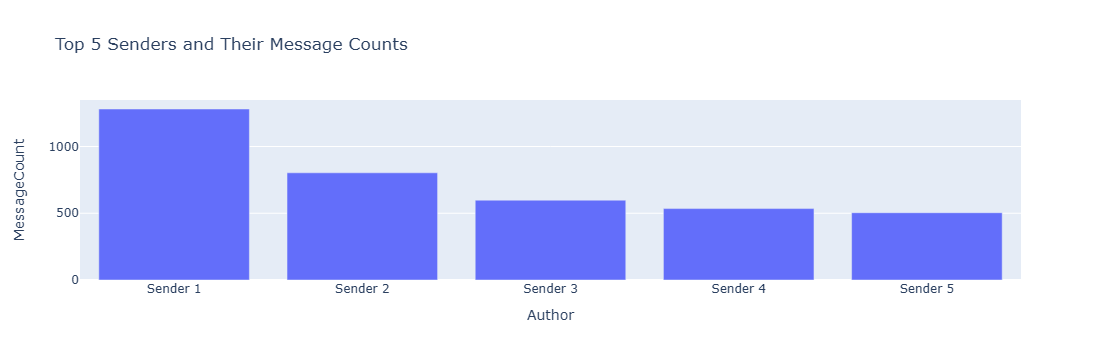

In [59]:
author_message_counts = df['Author'].value_counts()

# Sort the author_message_counts in descending order and select the top 5
top_authors = author_message_counts.head(5)

# Create a DataFrame from the top_authors Series
top_authors_df = top_authors.reset_index()
top_authors_df.columns = ['Author', 'MessageCount']

# Plot the bar graph
fig = px.bar(top_authors_df, x='Author', y='MessageCount', title='Top 5 Senders and Their Message Counts')

# Hide every x-axis value


fig.show()


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18681 entries, 0 to 22041
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           18468 non-null  datetime64[ns]
 1   Time           18681 non-null  object        
 2   Author         18087 non-null  object        
 3   Message        18681 non-null  object        
 4   urlcount       18681 non-null  int64         
 5   Letter_Count   18681 non-null  int64         
 6   Word_count     18681 non-null  int64         
 7   Message_count  18681 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.3+ MB


In [72]:
pd.set_option('display.max_colwidth', None)

# Filter messages for the specific author
shreyash_data = df[df['Author'] == 'Sender 7'][['Date', 'Message']]

# Function to format date and message
def format_message(row):
    if pd.notnull(row['Date']):  # Check if the date is not null
        return f"{row['Date'].strftime('%Y-%m-%d %H:%M')} : '{row['Message']}'"
    else:
        return "Invalid Date : '{}'".format(row['Message'])

# Apply the function to each row
shreyash_messages = shreyash_data.apply(format_message, axis=1)

# Print the messages
print("Number of messages found : {}".format(len(shreyash_messages)))
print(shreyash_messages.to_string(index=False))

Number of messages found : 495
                                      2023-01-01 00:00 : ' Bosdike pdhle teri biradri walo ko empower krne ki mt soche'
                                                                             2023-01-02 00:00 : ' Bhai tum bhi pdho fr'
                                                       2023-01-02 00:00 : ' Yha group pe bkchodi krne se kuch nii hoga'
                                                    2023-01-02 00:00 : ' To bhai Amrutansh ko kaise imposter keh rha h'
                                                                        2023-01-04 00:00 : ' Ye kya bawasir bna die ho'
                                                                         2023-01-04 00:00 : ' Kisi k pass soup h kya??'
                                                           2023-01-10 00:00 : ' Kuch nhi bhai jyada 🌶️ thi golgappe me'
                                                                2023-01-10 00:00 : ' Lord puneet k bad naya revolution'
         

In [62]:

search_word = input("Enter a word to search for in messages: ").lower()

# Filter messages containing the search word
messages_containing_word = df[df['Message'].str.lower().str.contains(search_word)]['Message']

# Get the count of messages containing the search word
message_count = len(messages_containing_word)

# Print the count of messages found
print("Number of messages containing the word '{}': {}".format(search_word, message_count))

# Print the messages containing the search word
print("\nMessages containing the word '{}':".format(search_word))
for message in messages_containing_word:
    print(message)

Enter a word to search for in messages:  Bhai


Number of messages containing the word 'bhai': 2049

Messages containing the word 'bhai':
 Bhai man bana lo khelna kya h 😂 hgv
 Bhai kaand ho gya
 Bhai ek ldka mutthi maarta pkd lia
 Haa bhai
 Bhej do bhai...
 Bhai koi sunil h kya
 Kis taraf aana h bhai?
 Q bhai..
 Bhai konsa room?
 Nhi bhai
 Late ho gaya bhai ab
 Bhai scholarship schemes ki photo send kr do
 Bhai IT ka koi grp ni hai?
 H bhai
 Bhai link bhej de
 Ye le bhai
 Thanks ujjwal bhai
 Bhai scholarship wale sir ka number ho kisi ke pas to send krna pls
 Raste mein hu bhai
 Bhai koi IT ki rb list bhej do
 Bhai sb ka ek sath hi kho gya kya
 Bhai yeh 3rd and final year RDs ki mail kya hai?
Sender 24: Bhai  5:30 pm hostel ke badminton ground me hogi pratiyogita sabhi bhaag lene waale apni apni tyari karle
 Bhai Bank Manager ne bola ki aisa kuch nhi h
 Are bhai manager mam hi h bss baki staff h
 Rhne de bhai tuu
 Nhi Bhai vikas aur me ek sath gaye the, sir ne hame hi bataya hamne grp par dal diya, ab dekh lena.
 Hn thk h bhaii😒
 Us

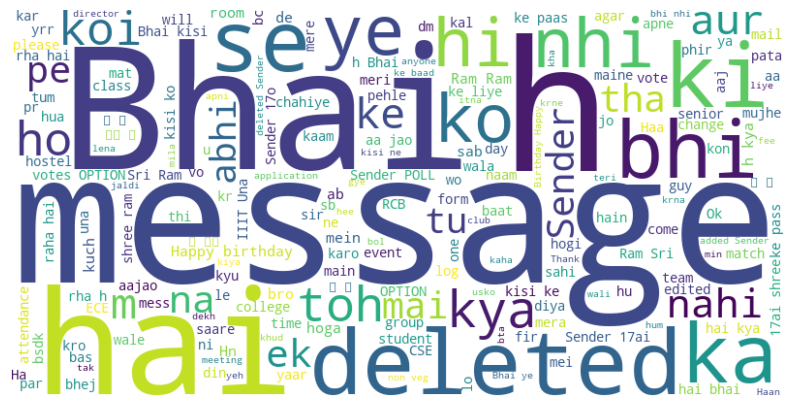

In [63]:

all_messages = ' '.join(df['Message'].tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

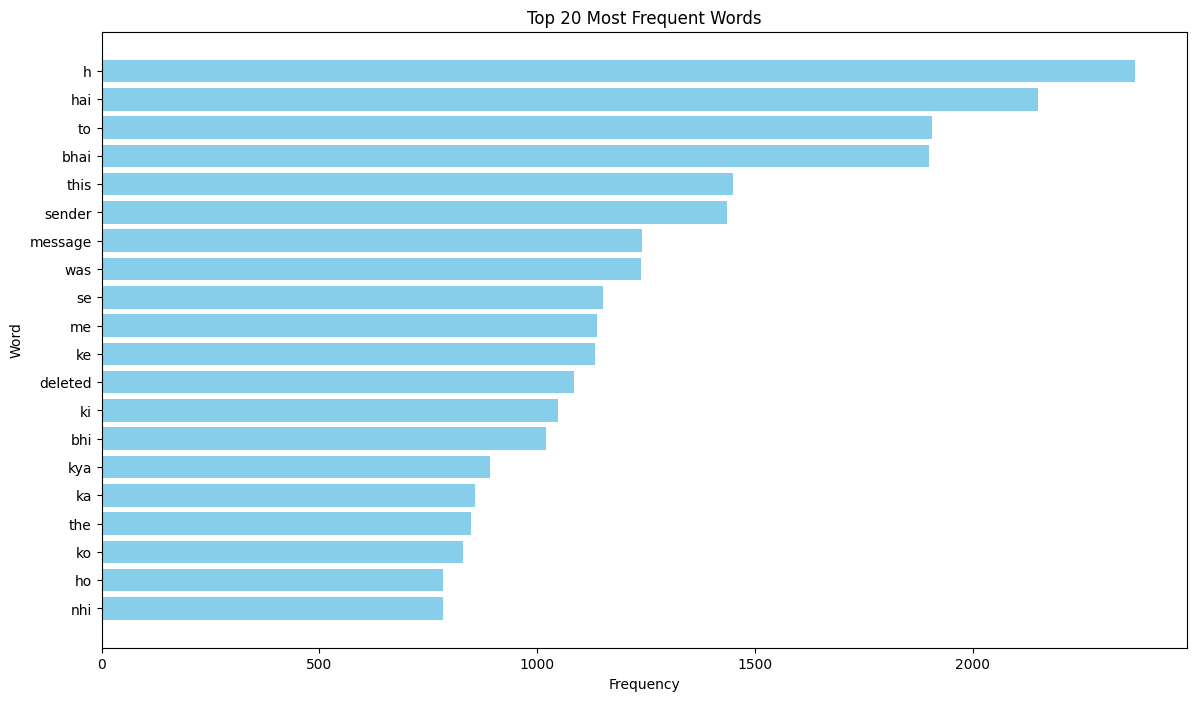

In [69]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Function to preprocess text and extract words
def extract_words(text):
    words = re.findall(r'\b\w+\b', text.lower())  # Extract words and convert to lowercase
    return words

# Assuming df is your DataFrame and it has a column named 'Message'
all_messages = ' '.join(df['Message'].tolist())  # Join all messages into a single string

# Extract words from all messages
words = extract_words(all_messages)

# Count the frequency of each word
word_freq = Counter(words)

# Convert to a DataFrame for easier manipulation
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Sort by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)  # Top 20 words

# Plot the bar chart
plt.figure(figsize=(14, 8))
plt.barh(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Words')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest frequencies at the top
plt.show()
